# Preliminary Trading Techniques Overview

## Extracting and Exploring data

In [1]:
import pandas as pd

In [2]:
import yfinance as yahooFinance

GetFacebookInformation = yahooFinance.Ticker("NVDA")
print(GetFacebookInformation.info)


{'address1': '2788 San Tomas Expressway', 'city': 'Santa Clara', 'state': 'CA', 'zip': '95051', 'country': 'United States', 'phone': '408 486 2000', 'website': 'https://www.nvidia.com', 'industry': 'Semiconductors', 'industryKey': 'semiconductors', 'industryDisp': 'Semiconductors', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': "NVIDIA Corporation provides graphics and compute and networking solutions in the United States, Taiwan, China, Hong Kong, and internationally. The Graphics segment offers GeForce GPUs for gaming and PCs, the GeForce NOW game streaming service and related infrastructure, and solutions for gaming platforms; Quadro/NVIDIA RTX GPUs for enterprise workstation graphics; virtual GPU or vGPU software for cloud-based visual and virtual computing; automotive platforms for infotainment systems; and Omniverse software for building and operating metaverse and 3D internet applications. The Compute & Networking segment co

In [3]:
print("Company Sector : ", GetFacebookInformation.info['sector'])
print("Price Earnings Ratio : ", GetFacebookInformation.info['trailingPE'])
print("Company Beta : ", GetFacebookInformation.info['beta'])


Company Sector :  Technology
Price Earnings Ratio :  55.204727
Company Beta :  1.657


In [4]:
# Let us get historical stock prices for Facebook 
# covering the past few years.
# max->maximum number of daily prices available 
# for Facebook.
# Valid options are 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 
# 5y, 10y and ytd.
meta_data = GetFacebookInformation.history(period="max")
print(meta_data)



                                 Open        High         Low       Close  \
Date                                                                        
1999-01-22 00:00:00-05:00    0.040122    0.044779    0.035585    0.037615   
1999-01-25 00:00:00-05:00    0.040600    0.042033    0.037615    0.041556   
1999-01-26 00:00:00-05:00    0.042033    0.042869    0.037734    0.038331   
1999-01-27 00:00:00-05:00    0.038451    0.039406    0.036301    0.038212   
1999-01-28 00:00:00-05:00    0.038212    0.038451    0.037854    0.038092   
...                               ...         ...         ...         ...   
2024-12-18 00:00:00-05:00  133.860001  136.699997  128.279999  128.910004   
2024-12-19 00:00:00-05:00  131.759995  134.029999  129.550003  130.679993   
2024-12-20 00:00:00-05:00  129.809998  135.279999  128.220001  134.699997   
2024-12-23 00:00:00-05:00  136.279999  139.789993  135.119995  139.669998   
2024-12-24 00:00:00-05:00  140.000000  141.899994  138.649994  140.220001   

In [5]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6524 entries, 1999-01-22 00:00:00-05:00 to 2024-12-24 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6524 non-null   float64
 1   High          6524 non-null   float64
 2   Low           6524 non-null   float64
 3   Close         6524 non-null   float64
 4   Volume        6524 non-null   int64  
 5   Dividends     6524 non-null   float64
 6   Stock Splits  6524 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 407.8 KB


Open/Close — Captures the opening/closing price of the stock

Adj_Open/Adj_Close — An adjusted opening/closing price is a stock’s price on any given day of trading that has been revised to include any dividend distributions, stock splits, and other corporate actions that occurred at any time before the next day’s open.

Volume — It records the number of shares that are being traded on any given day of trading.

High/Low — It tracks the highest and the lowest price of the stock during a particular day of trading.

In [6]:
print(meta_data.describe())

              Open         High          Low        Close        Volume  \
count  6524.000000  6524.000000  6524.000000  6524.000000  6.524000e+03   
mean      8.116920     8.264579     7.954914     8.116271  6.008716e+08   
std      22.202765    22.595381    21.742373    22.183332  4.310389e+08   
min       0.032003     0.032600     0.030569     0.031286  1.968000e+07   
25%       0.256516     0.263662     0.250078     0.256516  3.403170e+08   
50%       0.435615     0.441928     0.428258     0.435539  5.025920e+08   
75%       4.467179     4.509525     4.394404     4.470187  7.317480e+08   
max     149.339720   152.879470   146.249911   148.869751  9.230856e+09   

         Dividends  Stock Splits  
count  6524.000000   6524.000000  
mean      0.000028      0.003296  
std       0.000358      0.141269  
min       0.000000      0.000000  
25%       0.000000      0.000000  
50%       0.000000      0.000000  
75%       0.000000      0.000000  
max       0.010000     10.000000  


Pandas’ resample() method is used to facilitate control and flexibility on the frequency conversion of the time series data. We can specify the time intervals to resample the data to monthly, quarterly, or yearly, and perform the required operation over it.

In [7]:
print(meta_data.resample('ME').mean())

                                 Open        High         Low       Close  \
Date                                                                        
1999-01-31 00:00:00-05:00    0.039585    0.040958    0.036898    0.038351   
1999-02-28 00:00:00-05:00    0.039016    0.040405    0.037200    0.038664   
1999-03-31 00:00:00-05:00    0.040034    0.041000    0.038596    0.039634   
1999-04-30 00:00:00-04:00    0.036915    0.037689    0.035642    0.036495   
1999-05-31 00:00:00-04:00    0.034391    0.035143    0.033215    0.034119   
...                               ...         ...         ...         ...   
2024-08-31 00:00:00-04:00  116.806506  119.962837  113.561098  117.103732   
2024-09-30 00:00:00-04:00  115.082833  117.541563  112.602605  115.043840   
2024-10-31 00:00:00-04:00  134.379001  136.277568  132.106116  134.316398   
2024-11-30 00:00:00-05:00  142.965649  144.895517  140.239337  142.502179   
2024-12-31 00:00:00-05:00  137.359478  139.568268  134.874196  137.226517   

## Calculating Returns

In [8]:
import numpy as np

In [9]:
# generate daily returns of stock

daily_close = meta_data[['Close']]

daily_return = daily_close.pct_change() # returns as fractional change
daily_return.fillna(0, inplace=True)
print(daily_return)


                              Close
Date                               
1999-01-22 00:00:00-05:00  0.000000
1999-01-25 00:00:00-05:00  0.104764
1999-01-26 00:00:00-05:00 -0.077593
1999-01-27 00:00:00-05:00 -0.003111
1999-01-28 00:00:00-05:00 -0.003143
...                             ...
2024-12-18 00:00:00-05:00 -0.011351
2024-12-19 00:00:00-05:00  0.013730
2024-12-20 00:00:00-05:00  0.030762
2024-12-23 00:00:00-05:00  0.036897
2024-12-24 00:00:00-05:00  0.003938

[6524 rows x 1 columns]


In [10]:
# find monthly returns
mdata = meta_data.resample('ME').apply(lambda x: x[-1])

monthly_return = mdata.pct_change()

/var/folders/05/m77m7f41753fkd9btgv2wwnc0000gn/T/ipykernel_48902/1057279201.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mdata = meta_data.resample('ME').apply(lambda x: x[-1])


## Moving averages

In [11]:
adj_price = meta_data['Close']
mav = adj_price.rolling(window=50).mean()
print(mav[-10:])

Date
2024-12-11 00:00:00-05:00    138.940392
2024-12-12 00:00:00-05:00    139.310355
2024-12-13 00:00:00-05:00    139.538525
2024-12-16 00:00:00-05:00    139.680297
2024-12-17 00:00:00-05:00    139.733873
2024-12-18 00:00:00-05:00    139.654456
2024-12-19 00:00:00-05:00    139.615239
2024-12-20 00:00:00-05:00    139.613224
2024-12-23 00:00:00-05:00    139.710810
2024-12-24 00:00:00-05:00    139.754000
Name: Close, dtype: float64


<Axes: xlabel='Date'>

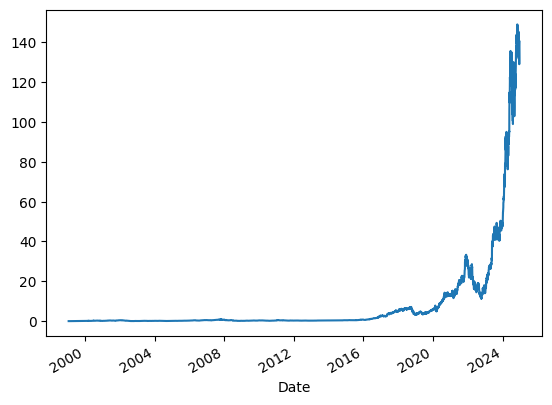

In [13]:
import matplotlib.pyplot as plt
#plt.use('agg')
adj_price.plot()

<Axes: xlabel='Date'>

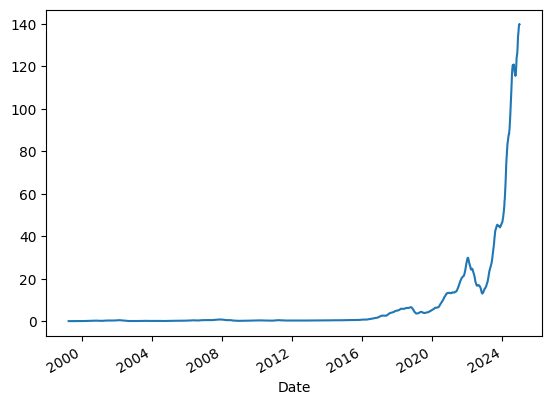

In [14]:
mav.plot()


## Simple Moving Average Crossover (SMAC) strategy

Momentum-based strategies are based on a technical indicator that capitalizes on the continuance of the market trend. We purchase securities that show an upwards trend and short-sell securities which show a downward trend.

In [15]:
# step1: initialize the short and long lookback periods
short_lb = 50
long_lb = 120
# step2: initialize a new DataFrame called signal_df with a signal column
signal_df = pd.DataFrame(index=meta_data.index)
signal_df['signal'] = 0.0


In [16]:
# step3: create a short simple moving average over the short lookback period
signal_df['short_mav'] = meta_data['Close'].rolling(window=short_lb,                           
                                                        min_periods=1, center=False).mean()

In [17]:
# step4: create long simple moving average over the long lookback period

signal_df['long_mav'] = meta_data['Close'].rolling(window=long_lb, min_periods=1, center=False).mean()

In [18]:
# step5: generate the signals based on the conditional statement
signal_df.iloc[short_lb:, signal_df.columns.get_loc('signal')] = np.where(
    signal_df.iloc[short_lb:, signal_df.columns.get_loc('short_mav')] > signal_df.iloc[short_lb:, signal_df.columns.get_loc('long_mav')], 
    1.0, 
    0.0
)


In [24]:
signal_df['positions'] = signal_df['signal'].diff()
signal_df[signal_df['positions'] == -1.0]


,signal,short_mav,long_mav,positions
Date,,,,
1999-04-07 00:00:00-04:00,0.0,0.039029,0.039050,-1.0
1999-05-06 00:00:00-04:00,0.0,0.037986,0.038057,-1.0
2000-11-17 00:00:00-05:00,0.0,0.260553,0.261433,-1.0
2001-09-17 00:00:00-04:00,0.0,0.312307,0.314204,-1.0
2002-04-04 00:00:00-05:00,0.0,0.423710,0.426673,-1.0
2003-02-28 00:00:00-05:00,0.0,0.088904,0.088975,-1.0
2003-09-17 00:00:00-04:00,0.0,0.149194,0.149237,-1.0
2004-06-10 00:00:00-04:00,0.0,0.174824,0.175440,-1.0
2005-05-17 00:00:00-04:00,0.0,0.179871,0.180194,-1.0


We have created 2 lookback periods. The short lookback period short_lb is 50 days, and the longer lookback period for the long moving average is defined as a long_lb of 120 days.

We have created a new DataFrame which is designed to capture the signals. These signals are being generated whenever the short moving average crosses the long moving average using the np.where. It assigns 1.0 for true and 0.0 if the condition comes out to be false.

The positions columns in the DataFrame tells us if there is a buy signal or a sell signal, or to stay put. We're basically calculating the difference in the signals column from the previous row using diff.

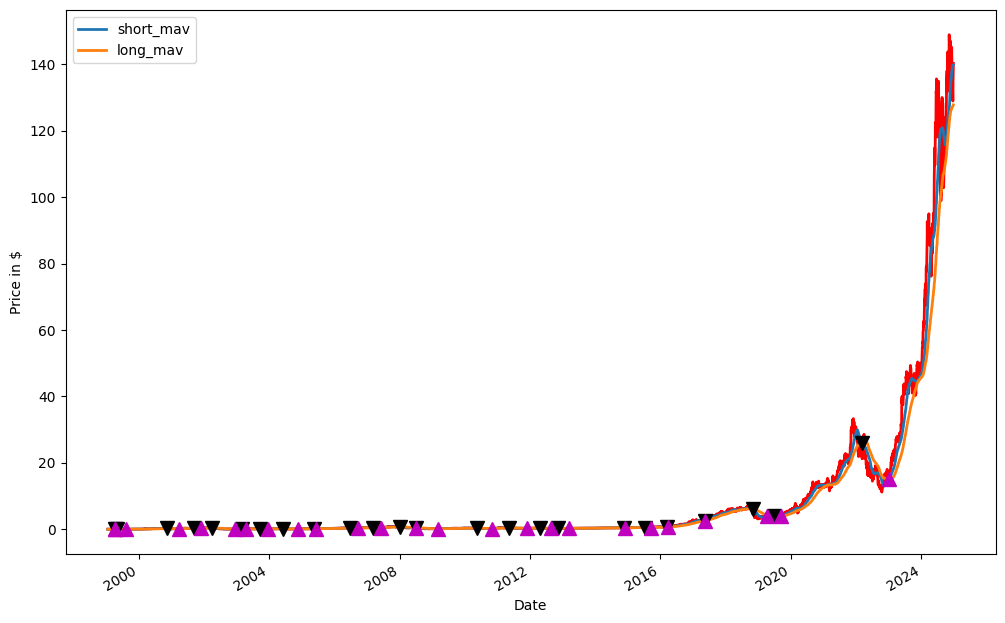

In [20]:
fig = plt.figure()
plt1 = fig.add_subplot(111,  ylabel='Price in $')
meta_data['Close'].plot(ax=plt1, color='r', lw=2.)
signal_df[['short_mav', 'long_mav']].plot(ax=plt1, lw=2., figsize=(12,8))
plt1.plot(signal_df.loc[signal_df.positions == -1.0].index,                         
          signal_df.short_mav[signal_df.positions == -1.0],'v',                     
          markersize=10, color='k')
plt1.plot(signal_df.loc[signal_df.positions == 1.0].index,          
          signal_df.short_mav[signal_df.positions == 1.0],         
          '^', markersize=10, color='m')         # Show the plotplt.show()


Whenever the blue line (short moving average) goes up and beyond the orange line (long moving average), there is a pink upward marker indicating a buy signal.

A sell signal is denoted by a black downward marker where there’s a fall of the short_mav below long_mav.

In [28]:

initial_capital = 10000  # Starting capital in USD
capital = initial_capital  # Initial capital
positions = 0  # Amount of stock owned
buy_price = 0  # Price at the time of buying
trade_results = []  # To store profit/loss for each trade

# Iterate through the signal_df to simulate the trades
for i in range(1, len(signal_df)):
    # Print statements for debugging
    print(f"Index {i}, Signal: {signal_df.iloc[i]['positions']}")
    
    # Buy signal (short_mav crosses above long_mav)
    if signal_df.iloc[i]['positions'] == 1 and positions == 0:  
        # Buy as much stock as possible with the available capital
        positions = capital / meta_data['Close'].iloc[i]  # Number of shares bought
        buy_price = meta_data['Close'].iloc[i]  # Store the buy price
        capital -= positions * buy_price  # Subtract the cost of buying the stock from capital
        print(f"Buying at {buy_price}, Capital after buy: {capital}, Positions: {positions}")
        
    # Sell signal (short_mav crosses below long_mav)
    elif signal_df.iloc[i]['positions'] == -1 and positions > 0:  
        # Sell the stock and calculate profit/loss
        sell_price = meta_data['Close'].iloc[i]  # Price at the time of selling
        profit = positions * (sell_price - buy_price)  # Calculate the profit or loss from this trade
        capital += positions * sell_price  # Add the proceeds from the sale to capital
        trade_results.append(profit)  # Store the profit/loss from this trade
        print(f"Selling at {sell_price}, Profit from trade: {profit}, Capital after sell: {capital}")
        positions = 0  # Reset the position (we've sold everything)

# After finishing all trades, calculate the final profit
total_profit = capital - initial_capital  # Total profit (final capital - initial capital)
win_rate = len([x for x in trade_results if x > 0]) / len(trade_results) if trade_results else 0
average_profit = np.mean(trade_results) if trade_results else 0

# Print the results
print(f"Total Profit: ${total_profit:.2f}")
print(f"Win Rate: {win_rate*100:.2f}%")
print(f"Average Profit per Trade: ${average_profit:.2f}")


Index 1, Signal: 0.0
Index 2, Signal: 0.0
Index 3, Signal: 0.0
Index 4, Signal: 0.0
Index 5, Signal: 0.0
Index 6, Signal: 0.0
Index 7, Signal: 0.0
Index 8, Signal: 0.0
Index 9, Signal: 0.0
Index 10, Signal: 0.0
Index 11, Signal: 0.0
Index 12, Signal: 0.0
Index 13, Signal: 0.0
Index 14, Signal: 0.0
Index 15, Signal: 0.0
Index 16, Signal: 0.0
Index 17, Signal: 0.0
Index 18, Signal: 0.0
Index 19, Signal: 0.0
Index 20, Signal: 0.0
Index 21, Signal: 0.0
Index 22, Signal: 0.0
Index 23, Signal: 0.0
Index 24, Signal: 0.0
Index 25, Signal: 0.0
Index 26, Signal: 0.0
Index 27, Signal: 0.0
Index 28, Signal: 0.0
Index 29, Signal: 0.0
Index 30, Signal: 0.0
Index 31, Signal: 0.0
Index 32, Signal: 0.0
Index 33, Signal: 0.0
Index 34, Signal: 0.0
Index 35, Signal: 0.0
Index 36, Signal: 0.0
Index 37, Signal: 0.0
Index 38, Signal: 0.0
Index 39, Signal: 0.0
Index 40, Signal: 0.0
Index 41, Signal: 0.0
Index 42, Signal: 0.0
Index 43, Signal: 0.0
Index 44, Signal: 0.0
Index 45, Signal: 0.0
Index 46, Signal: 0

## Future Directions

1. **Algorithm Enhancements**: Integrate advanced technical indicators and machine learning models for more accurate signals.
2. **Signal Optimization**: Adjust thresholds dynamically and conduct backtesting with different settings.
3. **Data Expansion**: Include more financial and alternative data for deeper insights.
4. **Risk Management**: Add risk metrics and analysis tools to evaluate strategy stability.
5. **Real-Time Processing**: Implement real-time data pipelines and visualization tools for immediate signal analysis.
6. **Automated Trading**: Develop a system for automatic trade execution with safety checks.
7. **Deployment and Scalability**: Use cloud services and containers for scalable and consistent performance.